In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
import glob
glob.glob("./gdrive/MyDrive/*")
import numpy as np

Mounted at /content/gdrive


In [ ]:
# # # Import training data # # #
import sys
data01=[]
with open('./gdrive/MyDrive/GPDSSE/input0810GPD-ENtr-t2.txt','r') as f1:
  for line in f1.readlines():
    row=[]
    toks=line.split(' ')
    for tok in toks:
      dnow=float(tok)
      row.append(dnow)

    data01.append(row)

In [ ]:
# # Loop loading to modify dimension and axes # #
data01=np.array(data01)
kazu1=data01.shape
kazu1=0.5*kazu1[0]
kazu1=kazu1-1
kazu1=int(kazu1)
datal1=data01[:,0:2]
y_train=datal1[0,:]
datal1=datal1[1:,:]
dataE1=data01[:,2:]
x_train=dataE1[:2,:]
x_train=np.array(x_train)
x_train=x_train.T
x_train=np.array([[x_train]])
dataE1=dataE1[2:,:]
y_train=np.array([y_train])
for i in range(kazu1):
  now=i+1
  now1=2*now-1
  now1=now1-1
  now2=2*now
  dataNow=dataE1[now1:now2,:]
  dataNow=np.array(dataNow)
  dataNow=dataNow.T
  dataNow=np.array([[dataNow]])
  x_train=np.append(x_train,dataNow,axis=0)
  labeNow=datal1[now2,:]
  labeNow=np.array([labeNow])
  y_train=np.append(y_train,labeNow,axis=0)

print(x_train.shape)
print(y_train.shape)

(18312, 1, 121, 2)
(18312, 2)


In [ ]:
# # # Import test data # # #
data02=[]
with open('./gdrive/MyDrive/GPDSSE/input0810GPD-ENteCo2-t2.txt','r') as f2:
  for line in f2.readlines():
    row=[]
    toks=line.split(' ')
    for tok in toks:
      dnow=float(tok)
      row.append(dnow)

    data02.append(row)

In [ ]:
# # Loop loading to modify dimension and axes # #
data02=np.array(data02)
kazu2=data02.shape
kazu2=0.5*kazu2[0]
kazu2=kazu2-1
kazu2=int(kazu2)
datal2=data02[:,0:2]
y_test=datal2[0,:]
datal2=datal2[1:,:]
dataE2=data02[:,2:]
x_test=dataE2[:2,:]
x_test=np.array(x_test)
x_test=x_test.T
x_test=np.array([[x_test]])
dataE2=dataE2[2:,:]
y_test=np.array([y_test])
for i in range(kazu2):
  now=i+1
  now1=2*now-1
  now1=now1-1
  now2=2*now
  dataNow=dataE2[now1:now2,:]
  dataNow=np.array(dataNow)
  dataNow=dataNow.T
  dataNow=np.array([[dataNow]])
  x_test=np.append(x_test,dataNow,axis=0)
  labeNow=datal2[now2,:]
  labeNow=np.array([labeNow])
  y_test=np.append(y_test,labeNow,axis=0)


print(x_test.shape)
print(y_test.shape)

(2169, 1, 121, 2)
(2169, 2)


In [ ]:
!pip install tensorflow
import tensorflow as tf
#%tensorflow_version 2.x
#!pip install tensorflow
#import tensorflow
#print('tensorflow version: ', tensorflow.__version__)

In [ ]:
# # Sequential model construction # #
layers=tensorflow.keras.layers
initializer1=tensorflow.keras.initializers.random_normal(mean=0.,stddev=1.)
initializer2=tensorflow.keras.initializers.random_normal(mean=0.,stddev=1.)
initializer3=tensorflow.keras.initializers.random_normal(mean=0.,stddev=1.)
initializer4=tensorflow.keras.initializers.random_normal(mean=0.,stddev=1.)
#initializer=tf.keras.initializers.zeros()
#initializer=tf.keras.initializers.ones()

model = tensorflow.keras.Sequential()
model.add(layers.InputLayer(shape=(1,121,2)))
model.add(layers.Conv2D(32, kernel_size = (1,21), activation='relu', kernel_initializer=initializer1))
model.add(layers.MaxPooling2D((1, 2)))
model.add(layers.Dropout(0.10))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size = (1,15), activation='relu', kernel_initializer=initializer2))
model.add(layers.MaxPooling2D((1, 2)))
model.add(layers.Dropout(0.10))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(200, kernel_initializer=initializer3))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.10))
model.add(layers.Dense(200, kernel_initializer=initializer4))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.10))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
predictions0 = model(x_train[:1]).numpy()
tensorflow.nn.softmax(predictions0).numpy()
loss_fn=tensorflow.keras.losses.categorical_crossentropy
loss_fn(y_train[:1],predictions0).numpy()

[[0. 1.]]
[[0. 1.]]


array([1.1920929e-07], dtype=float32)

In [ ]:
# # Ryn the training # #
adam=tensorflow.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=adam,loss=loss_fn,metrics=['accuracy'])
results=model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test,y_test))
model.evaluate(x_train, y_train, verbose=1)
model.evaluate(x_test,  y_test, verbose=1)
predictionsTr=model.predict(x_train)
predictionsTe=model.predict(x_test)
print(predictionsTr.shape)
print(predictionsTe.shape)
history0=results.history
# Save the trained model #
loop=1
savename='./gdrive/MyDrive/model0922GPD-t2-'+str(loop)
model.save(savename+'.keras',include_optimizer=True);


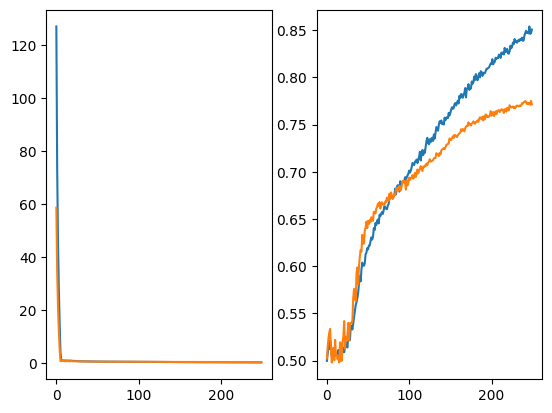

In [ ]:
# # Plot and save the tracks of loss and accuracy # #
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history0['loss'])
plt.plot(history0['val_loss'])
plt.subplot(1,2,2)
plt.plot(history0['accuracy'])
plt.plot(history0['val_accuracy'])
history1=np.array([history0['loss']])
history2=np.array([history0['accuracy']])
history3=np.array([history0['val_loss']])
history4=np.array([history0['val_accuracy']])
history=np.concatenate((history1,history2,history3,history4),axis=0)
history=history.T
np.savetxt("hist0922GPD-t2-1.txt",history,delimiter=" ")
predTr=np.concatenate((y_train,predictionsTr),axis=1)
np.savetxt("pred0922GPD-t2-1.txt",predTr,delimiter=" ")
predTe=np.concatenate((y_test,predictionsTe),axis=1)
np.savetxt("pred0922GPD-t2-1.txt",predTe,delimiter=" ")

In [ ]:

# # Load the trained model to apply Grad-CAM (Optional) # #
loop=1
savename='./gdrive/MyDrive/model0922GPD-t2-'+str(loop)
pre_model=tf.keras.models.load_model(savename+'.keras')
pre_model.evaluate(x_test,  y_test, verbose=1)
pre_model.summary()

# # Input test data # #
#predictionsTe=pre_model.predict(x_test)
#predTe=np.concatenate((y_test,predictionsTe),axis=1)
#np.savetxt("pred0922GPD-t2-1.txt",predTe,delimiter=" ")

import cv2
#from tensorflow.keras.preprocessing import image
#from image import array_to_img
#from image import img_to_array
#from image import load_img
#from keras.models import load_model

def grad_cam(model,img,layer_name,cls,img_size=(1,121,2)):
    grad_model=models.Model(inputs=[model.inputs],outputs=[model.get_layer(layer_name).output,model.output])

    # Image to array
    #img_array=img_to_array(img) Now the input is already array in (height,width,channel)
    img_array=img
    img_array=np.expand_dims(img_array,axis=0)

    # Obtain gradient
    with tf.GradientTape() as tape:
        conv_outputs,predictions=grad_model(img_array)
        loss=predictions[:,cls]

    # Loss gradient about target output
    grads=tape.gradient(loss,conv_outputs)
    # Average gradient
    pooled_grads=np.mean(grads,axis=(0,1,2))
    # Weighting on each channel of target output
    conv_outputs2=tf.Variable(conv_outputs[0])
    for i in range(len(pooled_grads)):
        conv_outputs2[:,:,i].assign(conv_outputs2[:,:,i]*pooled_grads[i])
    # Average character map and apply ReLU
    heatmap=np.mean(conv_outputs2,axis=-1)
    heatmap=np.maximum(heatmap,0)
    heatmap/=np.max(heatmap)
    #print(heatmap.shape)
    # Superimpose heatmap onto the image
    heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    return heatmap


In [ ]:
modelNow=pre_model
layer_name='conv2d'
cls1=0
cls2=1

imgNow0=x_test[0]
cam1=grad_cam(modelNow,imgNow0,layer_name,cls1)
cam2=grad_cam(modelNow,imgNow0,layer_name,cls2)
heatTe=np.concatenate((cam1,cam2),axis=0)
for i in range(kazu2): # kazu2 = num of test data
    i=i+1
    imgNow=x_test[i]
    cam1=grad_cam(modelNow,imgNow,layer_name,cls1)
    cam2=grad_cam(modelNow,imgNow,layer_name,cls2)
    camNow=np.concatenate((cam1,cam2),axis=0)
    heatTe=np.append(heatTe,camNow,axis=0)

#print(heatTe.shape)
np.savetxt("heat0922GPD-te12-L1.txt",heatTe,delimiter=" ")